In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits(n_class=6) # We will load the digits dataset and only use six first of the ten available classes.

In [15]:
pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



Text(0.5, 1.0, 't-SNE')

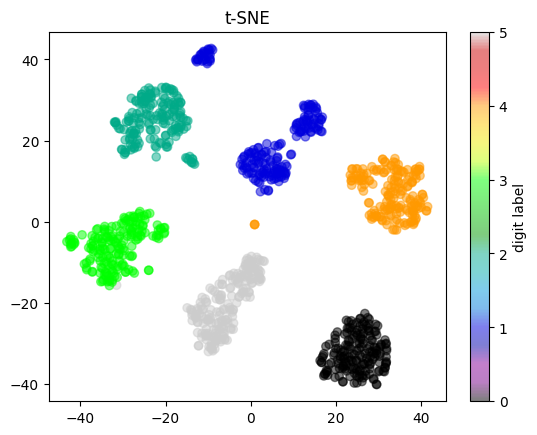

In [25]:
from sklearn.manifold import TSNE

digits_t2 = TSNE(n_components=2).fit_transform(digits.data)
plt.scatter(digits_t2[:,0], digits_t2[:,1], c=digits.target, cmap=plt.get_cmap('nipy_spectral'), alpha=.5)
plt.colorbar(label='digit label', ticks=range(10))
plt.title('t-SNE')

Text(0.5, 1.0, 'JL lemma + t-SNE')

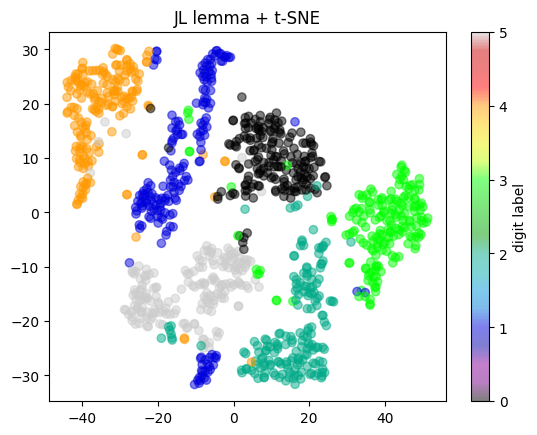

In [24]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE

rp = GaussianRandomProjection(n_components=11)
digits_t3 = rp.fit_transform(digits.data)
digits_t2 = TSNE(n_components=2).fit_transform(digits_t3)
plt.scatter(digits_t2[:,0], digits_t2[:,1], c=digits.target, cmap=plt.get_cmap('nipy_spectral'), alpha=.5)
plt.colorbar(label='digit label', ticks=range(10))

plt.title('JL lemma + t-SNE')

Text(0.5, 1.0, 'PCA')

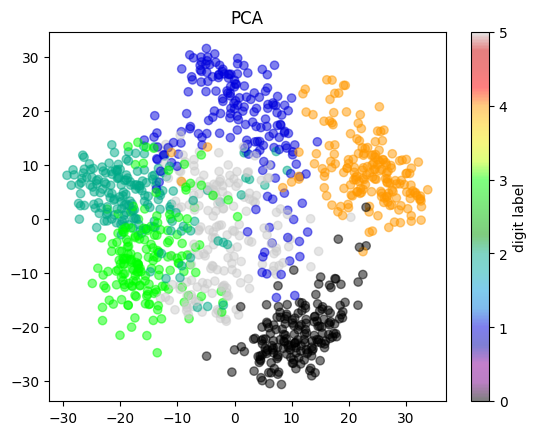

In [23]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(digits.data)
digits_t2=pca.fit_transform(digits.data)
plt.scatter(digits_t2[:,0], digits_t2[:,1], c=digits.target, cmap=plt.get_cmap('nipy_spectral'), alpha=.5)
plt.colorbar(label='digit label', ticks=range(10))
plt.title('PCA')

C:\Users\mrtar\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\mrtar\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Text(0.5, 1.0, 'MDS')

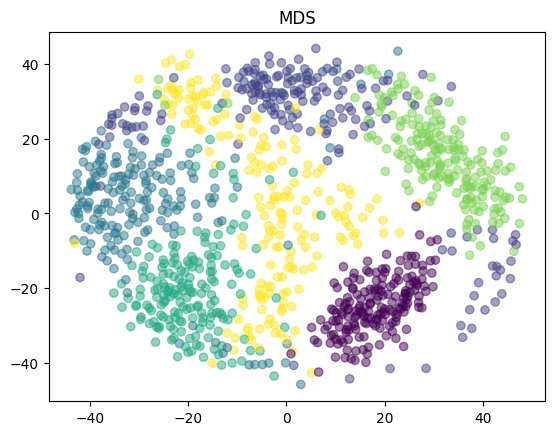

In [32]:
from sklearn.manifold import MDS

mds=MDS(n_components=2)
mds.fit(digits.data)
digits_t2=mds.fit_transform(digits.data)
plt.scatter(digits_t2[:,0],digits_t2[:,1],c=digits.target,alpha=.5)
plt.title('MDS')

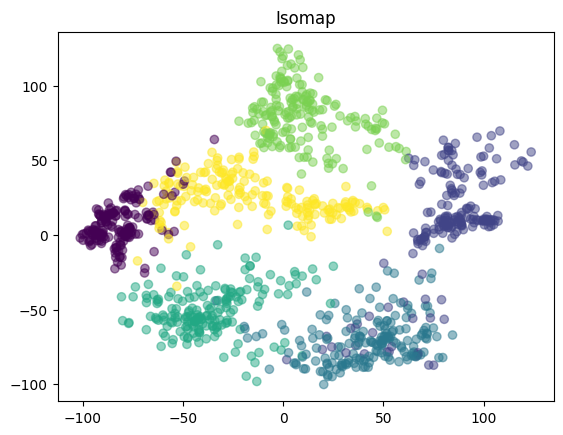

In [37]:
from sklearn.manifold import Isomap

# Define the number of neighbors
n_neighbors = 13

# Create the isomap
iso = Isomap(n_components=2, n_neighbors=n_neighbors)

# Fit the model
iso.fit(digits.data)

# Transform the data
digits_projected = iso.transform(digits.data)

# Plot the data
plt.scatter(digits_projected[:, 0], digits_projected[:, 1], c=digits.target, alpha=.5)
plt.title('Isomap')
plt.show()


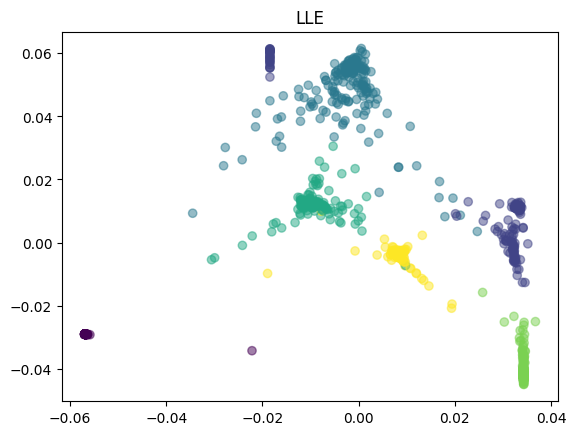

In [38]:
from sklearn.manifold import LocallyLinearEmbedding

# Define the number of neighbors
n_neighbors = 10

# Create the LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, method="standard", n_neighbors=n_neighbors)

# Fit the model
lle.fit(digits.data)

# Transform the data
digits_projected = lle.transform(digits.data)

# Plot the data
plt.scatter(digits_projected[:, 0], digits_projected[:, 1], c=digits.target, alpha=.5)
plt.title('LLE')
plt.show()


In [30]:
from sklearn.metrics import silhouette_score

best_score_iso = -1
best_score_lle = -1
best_neighbors_iso = None
best_neighbors_lle = None

for n_neighbors in range(10, 31):  # Try values from 10 to 30
    #... rest of your code
    # assuming reasonable values between 2 and 50
    iso = Isomap(n_components=2, n_neighbors=n_neighbors)
    lle = LocallyLinearEmbedding(n_components=2, method="standard", n_neighbors=n_neighbors)
    
    # For Isomap
    iso.fit(digits.data)
    digits_projected_iso = iso.transform(digits.data)
    score_iso = silhouette_score(digits_projected_iso, digits.target)
    
    if score_iso > best_score_iso:
        best_score_iso = score_iso
        best_neighbors_iso = n_neighbors

    # For LLE
    lle.fit(digits.data)
    digits_projected_lle = lle.transform(digits.data)
    score_lle = silhouette_score(digits_projected_lle, digits.target)
    
    if score_lle > best_score_lle:
        best_score_lle = score_lle
        best_neighbors_lle = n_neighbors

print(f"Best n_neighbors for Isomap: {best_neighbors_iso}")
print(f"Best n_neighbors for LLE: {best_neighbors_lle}")

Best n_neighbors for Isomap: 13
Best n_neighbors for LLE: 10
